In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Which of $k$ chip brands sold at a convenience store are "the best"? 

Let $\mathbf x^{(t)}$ be a length $k$ vector counting the number of each kind of chip brand purchased by time $t$ (relative to some start time) on a given day. Assume $\mathbf x$ follows the ***multinomial distribution*** (with $t$ omitted for brevity)

$$p(\mathbf x | \mathbf p) = {\displaystyle {\frac {n!}{x_{1}!\cdots x_{k}!}}p_{1}^{x_{1}}\cdots p_{k}^{x_{k}}}$$

> A ***multinomial distribution*** generalizes the ***binary outcome*** of the ***binomial distribution*** to a ***categorical outcome***. So, a ***multinomial random variable*** also consists of $n$ "trials", but now there are $k$ possible outcomes as opposed to two ("success" or "failure"), and the observed nubmer of each of these outcomes (out of $n$ "trials") are recorded in $\mathbf x$.
> - The ***multinomial distribution*** is parameterized by a "probability vector" $\mathbf p$ of length $k$ which satisfies $\sum_{j=1}^k p_j = 1$ (and $p_j \geq 0$ for all $j$) and where $p_j$ specifies the probabilities of the $j^{th}$ outcome of the $k$ categorical outcomes modeled by the ***multinomial distribution***. 

The ***Dirichlet distribution*** has the form (again omitting $t$ for brevity)

$$f(\mathbf p | \boldsymbol\alpha) = \frac{1}{\mathrm{B}(\boldsymbol\alpha)} \prod_{j=1}^k p_j^{\alpha_j - 1} \quad E[p_j] = \frac{\alpha_j}{\sum_{j=1}^k \alpha_j} \quad \text{Var} [p_j]=\frac {E[p_j](1-E[p_j])}{1 + \sum_{j=1}^k \alpha_j} \quad \text{Cov}_{j\neq i}[p_j,p_i]=-\frac {E[p_j]E[p_i]}{1 + \sum_{j=1}^k \alpha_j}$$

and models a probability vector over a ***simplex***, meaning that $\sum_{j=1}^k p_j = 1$ (and $p_j \geq 0$ for all $j$). 

> A ***Dirichlet distribution*** generalizes a ***beta distribution*** which models a "probability-valued" ***random variable*** which takes on values between $0$ and $1$. So, a ***Dirichlet random variable*** $\mathbf p$ is a vector of $k$ "probabilities" which sum to $1$.
> - The ***Dirichlet distribution*** is parameterized by the length $k$ vector $\boldsymbol\alpha$ where $\alpha_j>0$ for all $j$. As indicated by the expectation, variance, and covariance formulas above, the $\boldsymbol\alpha$ parameter vector controls the behavior of the actualizations of a ***Dirichlet random variable*** $\mathbf p$.  

In [3]:
# Example draw for n=10 from a Multinomial distribution
stats.multinomial(p=[0.2,0.5,0.2,0.1], n=10).rvs(size=1)[0]
# You can re-run the cell a few times to see example actualizations 
# of this multinomial random variable, and note it's relationship to `n`

array([2, 4, 3, 1])

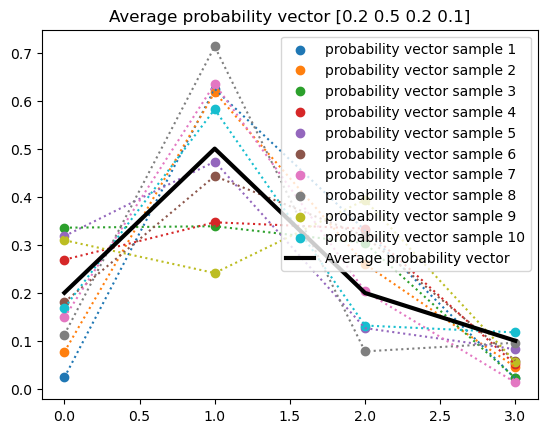

In [4]:
# Example draws from a Dirichlet distribution
plt.figure()
for i in range(10):
    p = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=1)[0]; plt.plot(p, ':')
    plt.scatter(x=[0,1,2,3], y=p, label="probability vector sample "+str(i+1))

p = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=100000).mean(axis=0)
plt.plot(p, 'k', linewidth=3, label="Average probability vector"); 
plt.title("Average probability vector "+str(p.round(3))); plt.legend();

1. [1/2 points] Using the "chips example", describe how the sequence $\mathbf x^{(t)}$ would generally behave over time $t$ assuing time $t=0$ is when the convenience store begins counting chip purchases.

With the t increases, the distribution of $x^{(t)}$ will be more closer to the shape of the distribution given the true p. 

2. [1/2 points] Specify the distribution $p(\mathbf p | \mathbf x^{(t)})$, your belief about the "best chips" at time $t$ according to a Bayesian analysis.


the distribution will also be a dirichlet distirbution.
the parameter for the $p(\mathbf p | \mathbf x^{(t)})$ will be (x1+a1, x2 +a2, ...., xk+ak)

3. [1/2 point] Provide code which samples from $p(p_j|\mathbf x^{(t)}=[2,5,2,1])$ which is one of the marginal distributions of $p(\mathbf p | \mathbf x^{(t)}=[2,5,2,1])$. 

- Hint 1: You do not have to analytically derive $p(p_j|\mathbf x^{(t)})$. You can sample from it just based on sampling from $p(\mathbf p | \mathbf x^{(t)})$.
- Hint 1: The $\alpha_j$ of the previous question now actually require chosen values. Use $1$ for each. 

In [42]:
j=1
np.array([[2,5,2,1]])[0,j] # replace this with coding sampling from p_j|x

# answer:
p = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=1000).mean(axis=0)
stats.multinomial(p=p, n=10).rvs(size=1)[0,j] 

4

4. [1/2 point] Provide code which estimates $\Pr(p_j>q|\mathbf x^{(t)}=[2,5,2,1])$ for some $q$ between $0$ and $1$.

In [27]:
# this can be done with for loops, or something like `...rvs(size=100000)[:,j]`

q = 0.5 # assume q = 0.5, which could be replace by any value
(stats.dirichlet(alpha=[2,5,2,1]).rvs(size=100000)[:,j] > q).mean()

0.5019

5. [1/2 point] Provide an interval quantifying your posterior uncertainty about the value of $p_j|\mathbf x^{(t)}=[2,5,2,1]$. 


(array([  61.,  340.,  922., 1595., 2108., 2100., 1612.,  867.,  346.,
          49.]),
 array([0.06035897, 0.14839092, 0.23642287, 0.32445482, 0.41248678,
        0.50051873, 0.58855068, 0.67658263, 0.76461458, 0.85264654,
        0.94067849]),
 <BarContainer object of 10 artists>)

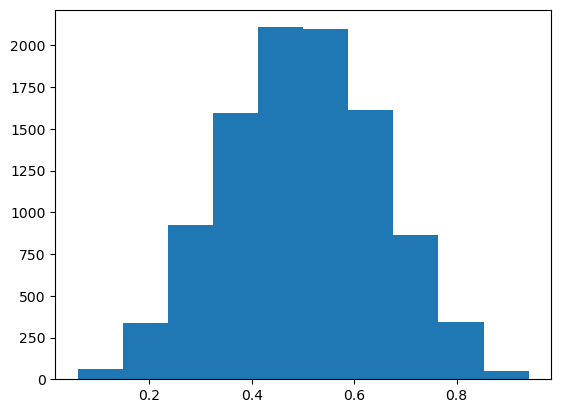

In [39]:
plt.hist(stats.dirichlet(alpha=[2,5,2,1]).rvs(size=10000)[:,j])

As a result, we can see from the graph that the value of the pj|x have a high probability to lie between [0.4, 0.6] and have a probability thatt higher than 95% to lie between [0.2, 0.8].

6. [1/2 point] Provide code which estimates $\Pr(p_j>p_{j'}|\mathbf x^{(t)}=[2,5,2,1])$ for $j\neq j'$.

In [32]:
# assume jj = j'
jj = 0 # which could be replaced by any value

(stats.dirichlet(alpha=[2,5,2,1]).rvs(size=1000)[:,j] >= stats.dirichlet(alpha=[2,5,2,1]).rvs(size=1000)[:,jj]).mean()


0.937

7. [1/2 points] Provide python code to sample from the distribution of $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)} =[2,5,2,1] \right)$ and provide an interval estimate quantifying your belief about the value of $\frac{p_j}{p_{j'}}$.


(array([824., 118.,  31.,  10.,  10.,   1.,   3.,   2.,   0.,   1.]),
 array([ 0.33497173,  5.89488376, 11.45479579, 17.01470782, 22.57461985,
        28.13453188, 33.69444391, 39.25435594, 44.81426797, 50.37418   ,
        55.93409203]),
 <BarContainer object of 10 artists>)

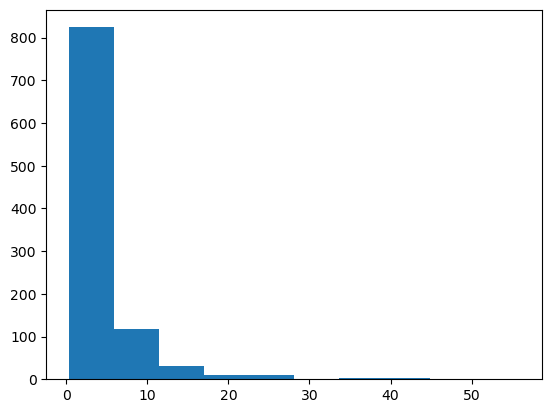

In [34]:
plt.hist(stats.dirichlet(alpha=[2,5,2,1]).rvs(size=1000)[:,j]/stats.dirichlet(alpha=[2,5,2,1]).rvs(size=1000)[:,jj])


As a result, we can see from the graph that we are 90 % confidence that the value is between [0,10]

8. [1/2 points] Provide python code to sample from the distribution of $p\left(p_j - p_{j'} | \mathbf x^{(t)} =[2,5,2,1] \right)$ and provide an interval estimate quantifying your belief about the value of $p_j - p_{j'}$. 

(array([ 11.,  26.,  71., 125., 195., 202., 171., 123.,  55.,  21.]),
 array([-0.23895587, -0.13753731, -0.03611875,  0.06529982,  0.16671838,
         0.26813694,  0.3695555 ,  0.47097407,  0.57239263,  0.67381119,
         0.77522975]),
 <BarContainer object of 10 artists>)

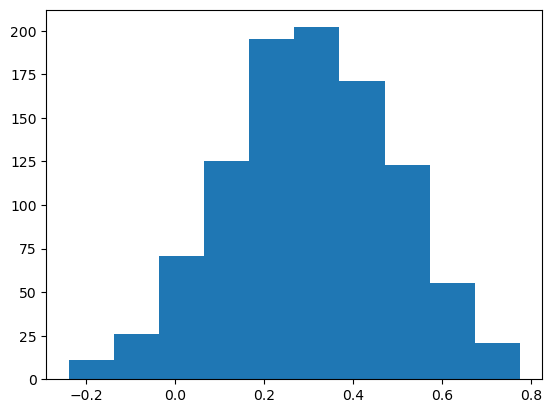

In [41]:
plt.hist(stats.dirichlet(alpha=[2,5,2,1]).rvs(size=1000)[:,j]-stats.dirichlet(alpha=[2,5,2,1]).rvs(size=1000)[:,jj])


from the graph, we can see that we are 90 % confidence that the value of the $p_j - p_{j'}$ liies between 0 and 0.6. 

9. [1/2 points] If the actual true $\mathbf p = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]$ why are both $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)}\right)$? and $p\left(p_j - p_{j'} | \mathbf x^{(t)} \right)$ relevant? What's different between these for $(j,j')=(2,3)$ as opposed to $(j,j')=(4,5)$?

Because assuming p_{j'} to be constant, the larger the difference between pj and p_j', the bigger the ratio it will be. 

However, the difference and ratio are not always decide each other. For example, if the difference is equal to 0.1, and both of their value is smaller than 0.01, it could lead to a big ratio. Nonetheless, if both of the value is bigger than 0.3, the ratio will much smaller than the ratio if both value is much smaller than 0.01. 

As a result, even if  $(j,j')=(4,5)$ have a smaller $p\left(p_j - p_{j'} | \mathbf x^{(t)} \right)$ than $(j,j')=(2,3)$, it is possible for them to have a much bigger $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)}\right)$, as their value is much smaller than  $(j,j')=(2,3)$.

10. [1/2 points] If the actual true $\mathbf p = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]$ what should be true about $t$ if we are examining 
$p\left(\frac{p_4}{p_{5}} | \mathbf x^{(t)}\right)$ or $p\left(p_4 - p_{5} | \mathbf x^{(t)} \right)$?

Hint: refer back to problem 1.


With the t increases, the distribution of real $x^{(t)}$ will be more closer to the shape of the distribution given the true p. thus, $p\left(\frac{p_4}{p_{5}} | \mathbf x^{(t)}\right)$ or $p\left(p_4 - p_{5} | \mathbf x^{(t)} \right)$ will be closer to the value calculated from the true value of p,which is 0.001 for the difference and 2 for the ratio.